## Incrementality Visualizaton

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [142]:
test_start_date = dt.datetime(2022, 1, 15)
test_end_date = dt.datetime(2022, 1, 21)

In [143]:
df = pd.read_csv("test_data.csv", parse_dates=[0], index_col=0)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2022-01-01 to 2022-01-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Treatment  31 non-null     int64
 1   Control    31 non-null     int64
dtypes: int64(2)
memory usage: 744.0 bytes


In [145]:
df.head(5)

,Treatment,Control
Date,,
2022-01-01,16365,18027
2022-01-02,19735,18444
2022-01-03,18356,15546
2022-01-04,17227,17328
2022-01-05,16315,17360


In [146]:
# Add difference column
df['Diff'] = df['Treatment'] - df['Control']

# Add cumulative sum column
df['Cumulative'] = df['Diff'].cumsum()

df.head(5)

,Treatment,Control,Diff,Cumulative
Date,,,,
2022-01-01,16365,18027,-1662,-1662
2022-01-02,19735,18444,1291,-371
2022-01-03,18356,15546,2810,2439
2022-01-04,17227,17328,-101,2338
2022-01-05,16315,17360,-1045,1293


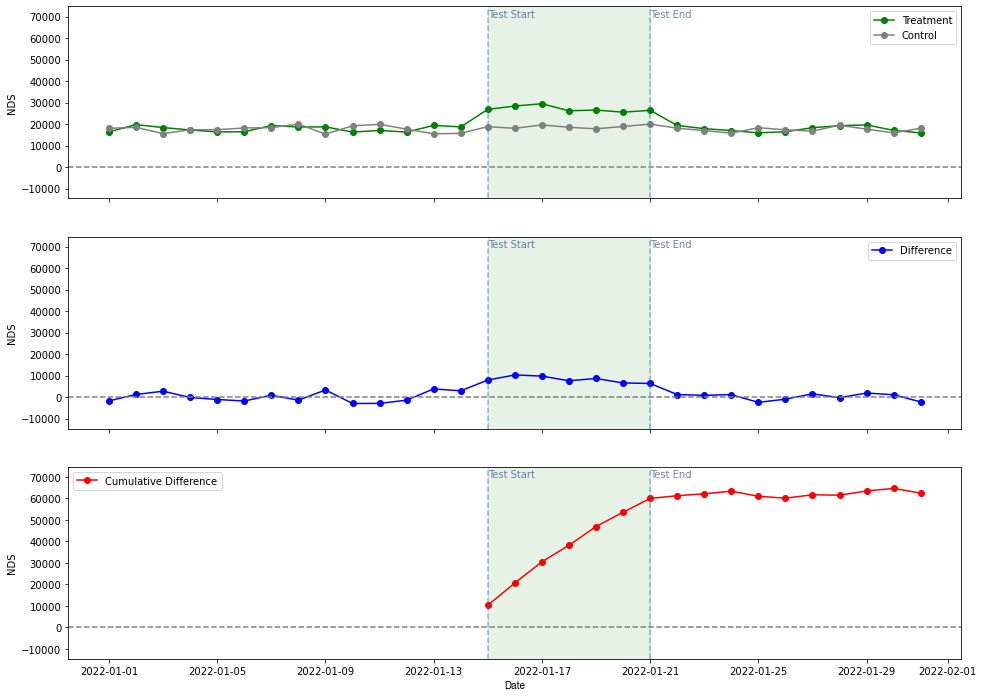

In [163]:
# 3-row subplot

fig, ax = plt.subplots(3,1, sharex=True, sharey=True, figsize = (16,12))
hfont = {'fontname':'Helvetica'}

#fig, ax = plt.subplots(3,1,sharex=True, sharey=True)

# 1: plot treatment and control absolute values
ax[0].plot(df.index,df['Treatment'], label = "Treatment", color = "green", marker = 'o')
ax[0].plot(df.index, df['Control'], label = "Control", color = "gray", marker='o')

ax[0].set_ylabel("NDS")
ax[0].legend()

# 2: plot treatment and control difference
ax[1].plot(df.index,df['Diff'], label = "Difference", color = "blue", marker = 'o')
ax[1].set_ylabel("NDS")
ax[1].legend()

# 3: plot treatment and control cumulative difference
ax[2].plot(df.index[df.index >= test_start_date], df['Cumulative'][df.index >= test_start_date], label = "Cumulative Difference", color = "red", marker = 'o')
ax[2].set_ylabel("NDS")
ax[2].legend()
ax[2].set_xlabel("Date", **hfont)

# Add origin lines
ax[0].axhline(y=0, c="gray", linestyle='dashed')
ax[1].axhline(y=0, c="gray", linestyle='dashed')
ax[2].axhline(y=0, c="gray", linestyle='dashed')

# Annotate

# Calculate max y -- somewhere above the max cumsum
y_upper = df['Cumulative'].max() + 10000
y_lower = df['Cumulative'].min() - 10000
y_pos = y_upper - 5000

ax[0].axvline(x=test_start_date, linestyle='dashed', alpha=0.5)
ax[0].axvline(x=test_end_date, linestyle='dashed', alpha=0.5)
ax[0].text(x=test_start_date, y=y_pos, s='Test Start', alpha=0.7, color='#334f8d')
ax[0].text(x=test_end_date, y=y_pos, s='Test End', alpha=0.7, color='#334f8d')

ax[1].axvline(x=test_start_date, linestyle='dashed', alpha=0.5)
ax[1].axvline(x=test_end_date, linestyle='dashed', alpha=0.5)
ax[1].text(x=test_start_date, y=y_pos, s='Test Start', alpha=0.7, color='#334f8d')
ax[1].text(x=test_end_date, y=y_pos, s='Test End', alpha=0.7, color='#334f8d')

ax[2].axvline(x=test_start_date, linestyle='dashed', alpha=0.5)
ax[2].axvline(x=test_end_date, linestyle='dashed', alpha=0.5)
ax[2].text(x=test_start_date, y=y_pos, s='Test Start', alpha=0.7, color='#334f8d')
ax[2].text(x=test_end_date, y=y_pos, s='Test End', alpha=0.7, color='#334f8d')

# Test Area Fill
x = pd.date_range(test_start_date, test_end_date)

ax[0].axvspan(test_start_date, test_end_date, alpha=0.1, color='green')
ax[1].axvspan(test_start_date, test_end_date, alpha=0.1, color='green')
ax[2].axvspan(test_start_date, test_end_date, alpha=0.1, color='green')

ax[2].set_ylim(y_lower, y_upper)

plt.show()

In [152]:
pd.date_range(test_start_date, test_end_date)

DatetimeIndex(['2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18',
               '2022-01-19', '2022-01-20', '2022-01-21'],
              dtype='datetime64[ns]', freq='D')